---
<h3 align = 'center'><font color = '#186A3B'>NYC Data Analysis for Predicting Property Prices</font></h3>

---


# Problem Statement:
The dataset contains property sales data for New York City from 2003 to present. The goal is to analyze and prepare the data for machine learning tasks such as predicting property prices.

## Dataset Description:
The dataset contains the following information for each property sale:

- Borough - Code for the borough (Manhattan, Bronx, etc.)
- Neighborhood - Name of the neighborhood
- Building class category - Type of building
- Tax class - Property tax class (1 to 4)
- Block and lot - Unique ID for the property
- Building class - Building class code (A for single family home, etc.)
- Address
- Zip code
- Residential units - Number of residential units
- Commercial units - Number of commercial units
- Total units - Total number of units
- Land square feet - Land area
- Gross square feet - Total building area
- Year built - Year the building was constructed
- Tax class at time of sale - Tax class when sold
- Building class at time of sale
- Sale price - Sale price of the property
- Sale date - Date of the sale


## Tasks:

- Data summary and missing value analysis
- Checking the target variable normality
- Designing hypothesis tests to gain insights
- Performing regression to determine relevant features to sale price
- Encoding categorical features for regression
- Considering missing values at each step

# Import Libraries

In [2]:
# Import libraries
import os
import pandas as pd
import numpy as np

from scipy.stats import skew, norm, kurtosis
from scipy import stats 
import statsmodels.api as sm

import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno


In [3]:
# Set the maximum number of rows and columns to display
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

%matplotlib inline
plt.style.use('ggplot')

---
<h1><font color = green>Datset Overview</font></h1>

---
Load in the provided dataset `20to22NYC.csv` and summarize the basic statistics. Specifically your code should answer:

1. What are the feature types and their basic statistics (using `describe(include='all')`)

2. How many features have missing values? 

3. What are the patterns of missing values and potential missing data reason for the top-3 most missed features.

**Load and Preliminary Explore the Dataset**



In [4]:
data_path = os.path.join(os.getcwd(), "20to22NYC.csv")
df = pd.read_csv(data_path)
df.head(5)

C:\Users\Lap-5\AppData\Local\Temp\ipykernel_3240\706680739.py:2: DtypeWarning: Columns (10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_path)


,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,5391,9,A5,4726 AMBOY ROAD,NaN,10312.0,1.0,0.0,1.0,3067.0,910.0,2002.0,1,A5,0.0,2020-07-02
1,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,5404,46,A1,119 LENZIE STREET,NaN,10312.0,1.0,0.0,1.0,8000.0,3660.0,1998.0,1,A1,315000.0,2020-10-02
2,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,5407,6,A1,118 ELMBANK STREET,NaN,10312.0,1.0,0.0,1.0,6200.0,2580.0,1975.0,1,A1,450000.0,2020-06-24
3,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,5425,31,A1,7 SANDGAP STREET,NaN,10312.0,1.0,0.0,1.0,2500.0,1222.0,1925.0,1,A2,525000.0,2020-07-02
4,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,6205,17,A5,91 EAGAN AVENUE,NaN,10312.0,1.0,0.0,1.0,1845.0,1854.0,1986.0,1,A5,480000.0,2020-01-14


In [5]:
df.sample(5)

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
181883,1,GREENWICH VILLAGE-CENTRAL,10 COOPS - ELEVATOR APARTMENTS,2,566,18,D4,"20 EAST 9TH STREET, 5C",NaN,10003.0,NaN,NaN,NaN,NaN,NaN,1964.0,2,D4,2564300.0,2022-01-19
55618,5,ROSEBANK,01 ONE FAMILY DWELLINGS,1,2982,1,A5,378 HYLAN BOULEVARD,NaN,10305.0,1.0,0.0,1.0,2475.0,1688.0,1995.0,1,A5,570000.0,2021-10-07
216282,1,MIDTOWN WEST,10 COOPS - ELEVATOR APARTMENTS,2,1030,29,D4,"200 CENTRAL PARK SOUTH, 21L",NaN,10019.0,NaN,NaN,NaN,NaN,NaN,1963.0,2,D4,660000.0,2021-07-08
26608,4,MASPETH,22 STORE BUILDINGS,4,2774,33,K4,66-42 GRAND AVENUE,NaN,11378.0,2.0,3,5,3400.0,3570.0,1925.0,4,K4,1650000.0,2022-03-14
144108,3,OCEAN PARKWAY-NORTH,01 ONE FAMILY DWELLINGS,1,6617,69,A1,1555 EAST 10TH STREET,NaN,11230.0,1.0,0.0,1.0,3000.0,1828.0,1925.0,1,A1,1650000.0,2021-03-02


In [6]:
df.columns

Index(['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'BUILDING CLASS AT PRESENT',
       'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE', 'RESIDENTIAL UNITS',
       'COMMERCIAL UNITS', 'TOTAL UNITS', 'LAND SQUARE FEET',
       'GROSS SQUARE FEET', 'YEAR BUILT', 'TAX CLASS AT TIME OF SALE',
       'BUILDING CLASS AT TIME OF SALE', 'SALE PRICE', 'SALE DATE'],
      dtype='object')

In [7]:
"""
Convert the column names in a pandas DataFrame for easy loading
"""
# Rename the columns in snake case style
df.columns = df.columns.str.lower().str.replace(' ', '_')

# Print the new column names
print(df.columns)

Index(['borough', 'neighborhood', 'building_class_category',
       'tax_class_at_present', 'block', 'lot', 'building_class_at_present',
       'address', 'apartment_number', 'zip_code', 'residential_units',
       'commercial_units', 'total_units', 'land_square_feet',
       'gross_square_feet', 'year_built', 'tax_class_at_time_of_sale',
       'building_class_at_time_of_sale', 'sale_price', 'sale_date'],
      dtype='object')


In [8]:
df[df.sale_price == 0].shape

(74899, 20)

> **OBSERVATION:** A 0 dollar sale indicates that there was a transfer of ownership without a cash consideration. There can be a number of reasons for a 0 dollar sale including transfers of ownership from parents to children. 

In [9]:
df.nunique().sort_values(ascending = False)

address                           241541
sale_price                         18809
block                              13104
land_square_feet                    9878
gross_square_feet                   9114
apartment_number                    9040
lot                                 4049
sale_date                           1096
total_units                          475
residential_units                    446
neighborhood                         255
zip_code                             196
year_built                           192
building_class_at_present            174
building_class_at_time_of_sale       173
commercial_units                     116
building_class_category               44
tax_class_at_present                  10
borough                                5
tax_class_at_time_of_sale              3
dtype: int64

In [10]:
print('Number of unique values in Block:', df.block.nunique())
print('Number of unique values in LOT:',df.lot.nunique())

Number of unique values in Block: 13104
Number of unique values in LOT: 4049


### (1) What are the feature types and their basic statistic?
> **Answer of feature types:** 

- **Categorical features:**
`borough`, `neighborhood`, `building_class_category`, `tax_class_at_present`, `building_class_at_present`, `address`, `apartment_number`, `zip_code`, `year_built`, `tax_class_at_time_of_sale`, `building_class_at_time_of_sale`

- `block` and `lot`: there are more than 11k unique blocks in the dataset, it doesn't make sense to define it as a categorical variable. **I will leave it as numerical**.

- **Numeric features:**
`block`,`lot`,`residential_units`,
`commercial_units`,`total_units`,`land_square_feet`,
`gross_square_feet`,`sale_price`

> **Answer of basic statistic:** shown in the code reults below.


#### **Features Types**

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258464 entries, 0 to 258463
Data columns (total 20 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   borough                         258464 non-null  int64  
 1   neighborhood                    258464 non-null  object 
 2   building_class_category         258464 non-null  object 
 3   tax_class_at_present            258143 non-null  object 
 4   block                           258464 non-null  int64  
 5   lot                             258464 non-null  int64  
 6   building_class_at_present       258143 non-null  object 
 7   address                         258464 non-null  object 
 8   apartment_number                62945 non-null   object 
 9   zip_code                        258445 non-null  float64
 10  residential_units               199349 non-null  object 
 11  commercial_units                162951 non-null  object 
 12  total_units     

> **OBSERVATION**: Data types of some columns need to be casted.


In [12]:
# Convert selected columns to categorical data type
# Define columns to be converted to categorical and numeric data types
cat_cols = ['borough', 'neighborhood', 'building_class_category', 'tax_class_at_present', 
            'building_class_at_present', 'address', 'apartment_number', 'zip_code', 
            'year_built', 'tax_class_at_time_of_sale', 'building_class_at_time_of_sale']

num_cols = ['block', 'lot', 'residential_units', 'commercial_units', 'total_units', 
            'land_square_feet', 'gross_square_feet', 'sale_price']

# Convert selected columns to categorical data type
df[cat_cols] = df[cat_cols].astype('category')
# Convert selected columns to numeric data type
df[num_cols] = df[num_cols].replace(',', '', regex=True).apply(pd.to_numeric)
# constructing the date time variable
df.sale_date= pd.to_datetime(df.sale_date)

In [13]:
# Check data types of columns
print(df.dtypes)

borough                                 category
neighborhood                            category
building_class_category                 category
tax_class_at_present                    category
block                                      int64
lot                                        int64
building_class_at_present               category
address                                 category
apartment_number                        category
zip_code                                category
residential_units                        float64
commercial_units                         float64
total_units                              float64
land_square_feet                         float64
gross_square_feet                        float64
year_built                              category
tax_class_at_time_of_sale               category
building_class_at_time_of_sale          category
sale_price                               float64
sale_date                         datetime64[ns]
dtype: object


#### **Basic Statistic**

In [14]:
df.describe(include='category').transpose()

,count,unique,top,freq
borough,258464,5,4,79552
neighborhood,258464,255,FLUSHING-NORTH,8419
building_class_category,258464,44,01 ONE FAMILY DWELLINGS,57236
tax_class_at_present,258143,10,1,118084
building_class_at_present,258143,174,R4,41698
address,258464,241541,55 AUSTIN PLACE,24
apartment_number,62945,9040,3A,975
zip_code,258445.0,196.0,10314.0,4673.0
year_built,240618.0,192.0,1920.0,18698.0
tax_class_at_time_of_sale,258464,3,1,126804


In [15]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
block,258464.0,4.205347e+03,3.583534e+03,1.0,1251.0,3273.5,6251.00,1.635000e+04
lot,258464.0,3.907985e+02,6.638566e+02,1.0,22.0,52.0,1003.00,9.116000e+03
residential_units,199349.0,3.110941e+00,2.938664e+01,0.0,1.0,1.0,2.00,8.764000e+03
commercial_units,162951.0,3.333149e-01,8.103192e+00,0.0,0.0,0.0,0.00,2.261000e+03
total_units,205304.0,3.285260e+00,2.992773e+01,0.0,1.0,1.0,2.00,8.812000e+03
land_square_feet,156996.0,6.006378e+03,1.139290e+05,0.0,1900.0,2500.0,3909.25,7.649136e+06
gross_square_feet,156996.0,5.488587e+03,4.887278e+04,0.0,1224.0,1810.0,2670.00,8.942176e+06
sale_price,258464.0,1.480856e+06,1.049733e+07,0.0,0.0,550000.0,990000.00,1.033000e+09


### (2) How many features have missing values?
> **Answer:**
- There are **10 features** in the DataFrame that have missing values. The number of missing values for each feature is as follows in the code results.


In [16]:
missing = df.isna().sum().sort_values(ascending = False)
print(f'Total Number of missing values in the Dataset {missing.sum()}\n')
missing = missing[missing>0]
missing

Total Number of missing values in the Dataset 624750



apartment_number             195519
land_square_feet             101468
gross_square_feet            101468
commercial_units              95513
residential_units             59115
total_units                   53160
year_built                    17846
tax_class_at_present            321
building_class_at_present       321
zip_code                         19
dtype: int64

> **OBSERVATION**: The total number of missing values in the DataFrame is 624,750. This represents a significant portion of the DataFrame, and it is important to consider how to handle these missing values before proceeding with any analysis.

**Visualize missing values**

<AxesSubplot:>

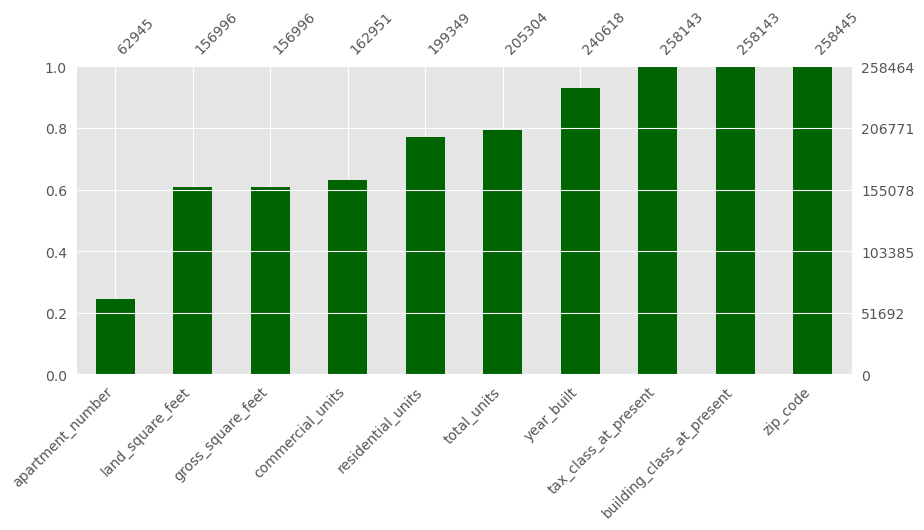

In [17]:
msno.bar(df[missing.index],figsize=(10,4),color='darkgreen', fontsize=10)

<AxesSubplot:>

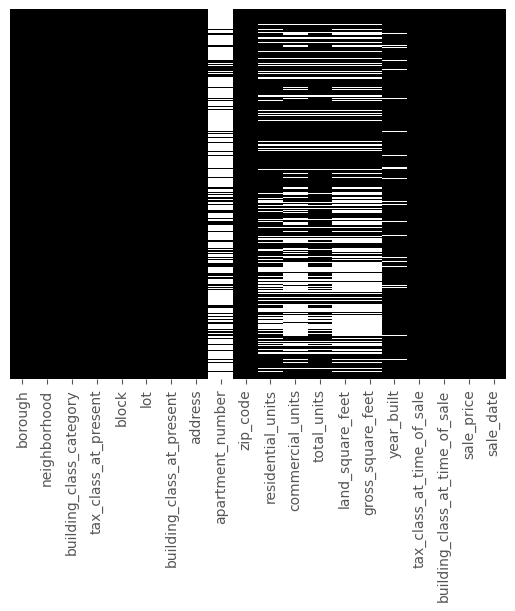

In [18]:
# Heatmap
sns.heatmap(df.isna(),yticklabels = False, cbar = False, cmap = 'Greys_r')

<AxesSubplot:>

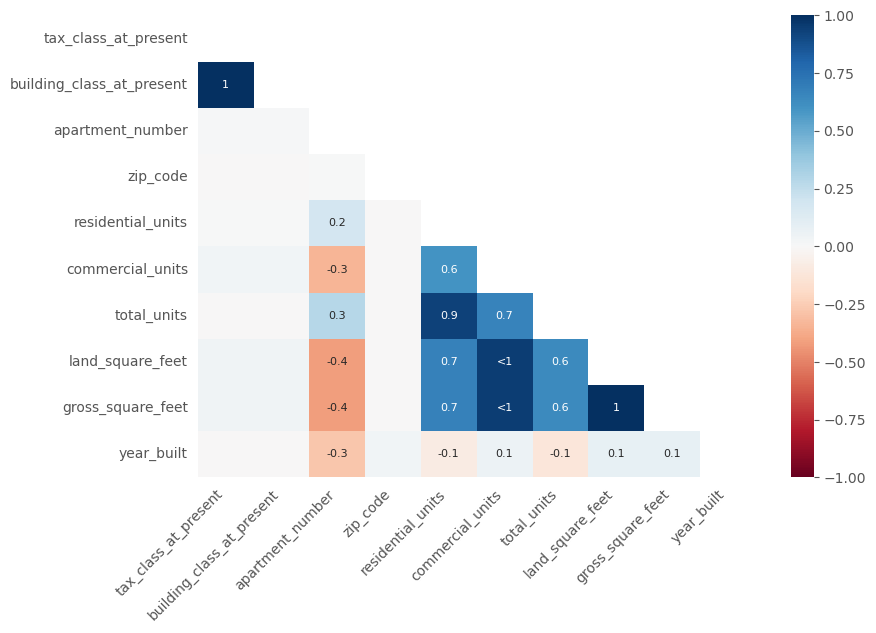

In [19]:
msno.heatmap(df, figsize = (9,6), fontsize=10)

> **OBSERVATION:**
The missing values in `land_square_feet` and `gross_square_feet` strongly correlated by `residential_units`, `commercial_units`, and `total_units`. So, the missing pattern is **MAT**.

<AxesSubplot:>

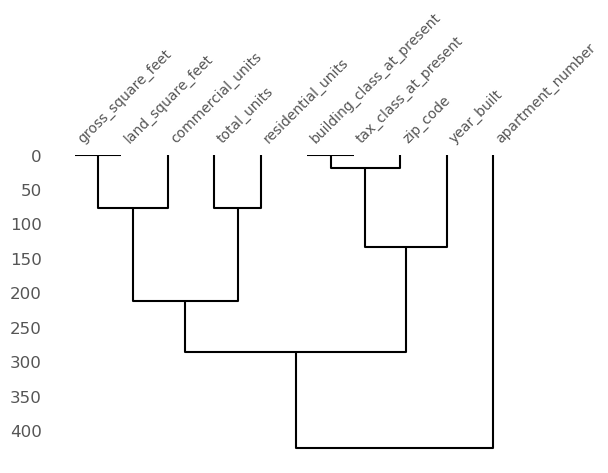

In [20]:
msno.dendrogram(df[list(missing.index)], figsize = (6,4), fontsize=10,)

> **OBSERVATION:** 
- Variables that are clustered together at a low height are **strongly correlated** in terms of their missing values: `gross_square_feet` and `commercial_units`. So, missing values are related to the observed values of `commercial_units` -> Pattern: **(MAT)**.
- Variables that are clustered together at a higher height are **less strongly correlated**: `apartment_number`. So, missing values are randomly distributed -> Pattern: **(MCAT)**.

### (3) What are the patterns of missing values and potential missing data reason for the top-3 most missed features?

All details explained in the observation under each cell result.

In [21]:
# Print the top-3 most missed features
top_3 = missing.nlargest(3)
print("Top-3 most missed features:")
print(top_3)

Top-3 most missed features:
apartment_number     195519
land_square_feet     101468
gross_square_feet    101468
dtype: int64


In [22]:
def Check_Pattern(missing, null_col):

  """
  This function checks the missing pattern mechanism of a DataFrame.

  Parameters
  ----------
  missing : pandas.DataFrame of other columns values when the missed column is NaN.

  Returns
  -------
  pandas.DataFrame
      The DataFrame with the unique values for feature that has one or 2 unique value when a spasific feature is missed.

  """
  missing = missing.drop(null_col, axis=1)
  # Create a new DataFrame to store the unique values for each feature
  unique_df = pd.DataFrame(data = np.random.rand(2))

  # Iterate over the columns of the DataFrame
  for col in missing.columns:

      # Get the number of unique values in the column
      nunique = missing[col].nunique()

      # If the number of unique values is 1 or 2, add the unique values to the DataFrame
      if nunique in [0, 1, 2]:
          unique_df.loc[:nunique, col + '_unique_vals'] = missing[col].unique()

  # Drop the first row from the DataFrame
  unique_df.drop(0, axis=1, inplace=True)

  # Interpret the result of unique_df
  if unique_df.empty:
      print(f'\t- Missing values in `{null_col}` are randomly distributed across the dataset')
      print(f'\t- So that the missing pattern mechanism should be: Missing Completely At Random (MCAR)')
  else:
      print(f'\t- Missing values in `{null_col}` depend on the values of other columns. Columns that have 1 or 2 unique are: {list(unique_df.columns)}')
      print(f'\t- So that the missing pattern mechanism should be: Missing At Random (MAR) or Missing Not At Random (MNAR)')
  # Return the DataFrame with the unique values for feature that has one or 2 unique value when a spasific feature is missed.
  return unique_df
###############################################################################################################################################
# Investigate the patterns of missing values in each column
def Missing_Pattern(col):
    print(f"\nFeature: {col}")
    print('-'*33)
    print(f"\t- Number of missing values: {top_3[col]}")
    print(f"\t- Percentage of missing values: {(top_3[col]/len(df))*100:.2f}%")
    print(f"\t- Data type: {df[col].dtype}")
    print(f"\t- Number of unique values: {df[col].nunique()}")
    print(f"\t- Most common value: {df[col].value_counts().idxmax()}")
    print(f"\nMissing value pattern:")
    print('-'*30)
    # other features values when col is missed
    missing = df[df[col].isna()]
    unique_df = Check_Pattern(missing, col)
    return missing, unique_df

#### **Check missing pattern in `apartment_number` feature**

In [23]:
missing_apart,unique_df1 = Missing_Pattern('apartment_number')


Feature: apartment_number
---------------------------------
	- Number of missing values: 195519
	- Percentage of missing values: 75.65%
	- Data type: category
	- Number of unique values: 9040
	- Most common value: 3A

Missing value pattern:
------------------------------
	- Missing values in `apartment_number` are randomly distributed across the dataset
	- So that the missing pattern mechanism should be: Missing Completely At Random (MCAR)


> **OBSERVATION**: 

The `apartment_number` feature has a large number of missing values, with **75.65%**. The values being missing and there are **9040 unique values** in the non-missing data. 

- **Missing Pattern**: The missing pattern mechanism is **MCAT**. As there is no systematic reason why some data is missing, and that the missing values are randomly distributed across the dataset.

- **Action**: Remove the column.

#### **Check missing pattern in `gross_square_feet` and `land_square_feet` features**

In [24]:
missing_land_sqrt,unique_df2 = Missing_Pattern('land_square_feet')
unique_df2


Feature: land_square_feet
---------------------------------
	- Number of missing values: 101468
	- Percentage of missing values: 39.26%
	- Data type: float64
	- Number of unique values: 9878
	- Most common value: 0.0

Missing value pattern:
------------------------------
	- Missing values in `land_square_feet` depend on the values of other columns. Columns that have 1 or 2 unique are: ['residential_units_unique_vals', 'commercial_units_unique_vals', 'total_units_unique_vals', 'gross_square_feet_unique_vals']
	- So that the missing pattern mechanism should be: Missing At Random (MAR) or Missing Not At Random (MNAR)


,residential_units_unique_vals,commercial_units_unique_vals,total_units_unique_vals,gross_square_feet_unique_vals
0,NaN,NaN,NaN,NaN
1,1.0,1.0,1.0,NaN


In [25]:
missing_gross_sqrt,unique_df3 = Missing_Pattern('gross_square_feet')
unique_df3


Feature: gross_square_feet
---------------------------------
	- Number of missing values: 101468
	- Percentage of missing values: 39.26%
	- Data type: float64
	- Number of unique values: 9114
	- Most common value: 0.0

Missing value pattern:
------------------------------
	- Missing values in `gross_square_feet` depend on the values of other columns. Columns that have 1 or 2 unique are: ['residential_units_unique_vals', 'commercial_units_unique_vals', 'total_units_unique_vals', 'land_square_feet_unique_vals']
	- So that the missing pattern mechanism should be: Missing At Random (MAR) or Missing Not At Random (MNAR)


,residential_units_unique_vals,commercial_units_unique_vals,total_units_unique_vals,land_square_feet_unique_vals
0,NaN,NaN,NaN,NaN
1,1.0,1.0,1.0,NaN


> **OBSERVATION**: 

The `land_square_feet` and `gross_square_feet` features have a significant number of missing values, with **39.26%** and there are **9,878 unique non-missing values**. 

- **Missing Pattern**: The missing pattern mechanism is **MAT** for both features (`land_square_feet` and `gross_square_feet`). As the probability of these two columns being missing depend on the values of the other three columns(`residential_units`, `commercial_units`, and `total_units`). when the units = 1 or `NaN` the `land_square_feet` and `gross_square_feet` is missed.

- **Action**: impute the missing values.

### **Handling Missing values**

Given the missing patterns and mechanisms of the features in the dataset, here are some possible methods to handle the missing values:

- For `apartment_number`: since it has a large number of missing values, and the missingness is completely at random, it may be reasonable to **exclude this feature from the analysis**.
- For `tax_class_at_present`, `building_class_at_present`, and `zip_code`: since it has a few number of missing values, it may be reasonable to **drop the nulls samples** from the dataset.
- For `residential_units`, `commercial_units`, `total_units`, and `year_built`: since the missingness is relatively small, and the missingness is completely at random, it may be reasonable to impute the missing values multiple imputation to generate several plausible values for each missing value.
- For `land_square_feet` and `gross_square_feet`: since the missingness is related to the value of `residential_units`, `commercial_units`, and `total_units` , I will try 2 possible approach; regression models and **multiple imputation by Chained imputation (MICE)** to generate several plausible values for each missing value and analyze the dataset multiple times using these imputed values.

#### **Drop `apartment_number`**

In [26]:
df = df.drop('apartment_number', axis = 1)

#### **Drop Nulls samples from `tax_class_at_present`, `building_class_at_present`, and `zip_code`**

In [27]:
# Drop samples with missing values in tax_class_at_present, building_class_at_present, or zip_code
df = df.dropna(subset=["tax_class_at_present", "building_class_at_present", "zip_code"])

#### **Handling `year_built` variables using th most frequent values**

In [28]:
df['year_built'] = df['year_built'].fillna(df['year_built'].mode()[0])

#### **Impute `residential_units`, `commercial_units`, and `total_units` variables using MICE**

In [29]:
from fancyimpute import IterativeImputer as MiceImputer

# Create a new dataframe with only the relevant columns
cols = ["residential_units", "commercial_units", "total_units"]
data = df[cols].values

# Perform MICE algorithm from the fancyimpute package to impute missing values 
mice_imputed_data = MiceImputer().fit_transform(data)

# Replace the missing values in the original dataframe with the imputed values
df["residential_units"] = mice_imputed_data[:, 0]
df["commercial_units"] = mice_imputed_data[:, 1]
df["total_units"] = mice_imputed_data[:, 2]

(CVXPY) May 19 07:22:31 AM: Encountered unexpected exception importing solver CVXOPT:
ImportError('DLL load failed while importing base: The specified module could not be found.')
(CVXPY) May 19 07:22:31 AM: Encountered unexpected exception importing solver GLPK:
ImportError('DLL load failed while importing base: The specified module could not be found.')
(CVXPY) May 19 07:22:31 AM: Encountered unexpected exception importing solver GLPK_MI:
ImportError('DLL load failed while importing base: The specified module could not be found.')


#### **Impute `land_square_feet`, and `gross_square_feet` variables using Linear Regression**

In [30]:
from sklearn.linear_model import LinearRegression

# Create a new dataframe with only the relevant columns
cols = ["land_square_feet", "gross_square_feet", "residential_units", "commercial_units", "total_units"]
data = df[cols].copy()

# Split the data into two sets: one with missing values and one without
missing_data = data[data.isnull().any(axis=1)]
complete_data = data.dropna()

# Fit a linear regression model to the complete data
# "land_square_feet", "gross_square_feet" are the target columns
X = complete_data.drop(columns=["land_square_feet", "gross_square_feet"])
y_land = complete_data["land_square_feet"]
y_gross = complete_data["gross_square_feet"]

# Train 2 linear regression models 
reg_land = LinearRegression().fit(X, y_land)
reg_gross = LinearRegression().fit(X, y_gross)

# Use the regression model to predict the missing values
X_missing = missing_data.drop(columns=["land_square_feet", "gross_square_feet"])
missing_data["land_square_feet"] = reg_land.predict(X_missing)
missing_data["gross_square_feet"] = reg_gross.predict(X_missing)

# Replace the missing values in the original dataframe with the predicted values
# df_LR = df.copy()
df.update(missing_data)

C:\Users\Lap-5\AppData\Local\Temp\ipykernel_3240\1610115318.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_data["land_square_feet"] = reg_land.predict(X_missing)
C:\Users\Lap-5\AppData\Local\Temp\ipykernel_3240\1610115318.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_data["gross_square_feet"] = reg_gross.predict(X_missing)


In [31]:
df.isna().sum().sum()

0

#### **Impute `land_square_feet`, and `gross_square_feet` variables using KNN**

In [32]:
# from sklearn.impute import KNNImputer

# # Impute missing values using KNN
# imputed_data = KNNImputer(n_neighbors=5).fit_transform(data)

# # Replace the missing values in the original dataframe with the imputed values
# df_knn = df.copy()
# df_knn["land_square_feet"] = imputed_data[:, 0]
# df_knn["gross_square_feet"] = imputed_data[:, 1]

#### **Missing Pattern:**
The dataset has 19 features, both categorical and numeric. 10 of the 19 features have missing values. The most missing values are in apartment_number (195,519), followed by `land_square_feet` and `gross_square_feet` (both at 101,468). 
- **`apartment_number`**: missing pattern mechanism is **MCAT**. As there is no systematic reason why some data is missing, and that the missing values are randomly distributed across the dataset. 
- **`land_square_feet` and `gross_square_feet`** : The missing pattern mechanism is **MAT** for the both features. As the probability of these two columns being missing depend on the values of the other three columns(`residential_units`, `commercial_units`, and `total_units`). when the units = 1 or NaN the `land_square_feet` and `gross_square_feet` is missed.

#### **Dataset Overview:**
After Explorint the dataset, I found that: 

| Variable                        | Type         | Description                                                                                                                                                          |
|---------------------------------|--------------|----------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| borough                         | categorical  | A digit code for the borough the property is located in; in order these are Manhattan (1), Bronx (2), Brooklyn (3), Queens (4), and Staten Island (5).            |
| neighborhood                    | categorical  | The name of the neighborhood where the property is located.                                                                                                         |
| building_class_category         | categorical  | A code indicating the type of building (in this case, all properties are classified as 01 ONE FAMILY DWELLINGS).                                                    |
| tax_class_at_present            | categorical  | Every property in the city is assigned to one of four tax classes (Classes 1, 2, 3, and 4), based on the use of the property.                                          |
| block                           | numeric      | A Tax Block is a sub-division of the borough on which real properties are located. The Department of Finance uses a Borough-Block-Lot classification to label all real property in the City. |
| building_class_at_time_of_sale  | categorical  | A code indicating the type of building at the time of sale. The first position of the Building Class is a letter that is used to describe a general class of properties (for example “A” signifies one-family homes, “O” signifies office buildings. “R” signifies condominiums). |
| address                         | text         | The street address of the property.                                                                                                                                 |
| zip_code                        | categorical  | The ZIP code of the property.                                                                                                                                       |
| residential_units               | numeric      | The number of residential units in the building.                                                                                                                    |
| commercial_units                | numeric      | The number of commercial units in the building.                                                                                                                     |
| total_units                     | numeric      | The total number of units in the building.                                                                                                                          |
| land_square_feet                | numeric      | The area of the land on which the building is located.                                                                                                               |
| gross_square_feet               | numeric      | The total area of all the floors of a building as measured from the exterior surfaces of the outside walls of the building, including the land area and space within any building or structure on the property. |
| year_built                      | categorical  | The year the building was constructed.                                                                                                                               |
| tax_class_at_time_of_sale       | categorical  | The tax class of the property at the time of sale.                                                                                                                  |
| building_class_at_time_of_sale  | categorical  | A code indicating the type of building at the time of sale.                                                                                                          |
| sale_price                      | numeric      | The sale price of the property.                                                                                                                                     |
| sale_date                       | datetime     | The date of the sale.                                                                                                                                               |
> **Sources**: 

1. [NYC-Real-Estate-Price-prediction](http://github.com/paripon123/NYC-Real-Estate-price-prediction)
2. [New-York-Price-Prediction (Actual-Data)](http://github.com/ashishtele/New-York-Price-Prediction---Actual-Data)
3. [BA 505 Python for Analytics (DSB 2018)](http://github.com/fairfield-university-ba505-fall2018/final-project-robotics-champs)
4. [NYC Property Sales by Aviv Farag, Joseph Logan, and Abdulaziz Alquzi](http://github.com/avivfaraj/DSCI631-project)
5. [NYC Property Sales on Kaggle](http://www.kaggle.com/ritabo/projekt-ml)

----

### **Graphically Check Normality**

In [33]:
def graph_normality(df, feature):
    fig, axes = plt.subplots(1, 2, figsize=(10, 3))

    # plot a histogram of the feature variable
    sns.distplot(df[feature], kde=True, hist_kws=dict(edgecolor="k"), ax=axes[0])

    # Calculate skewness and kurtosis then add them to the plot
    skewness = stats.skew(df[feature])
    kurt = stats.kurtosis(df[feature])
    axes[0].text(0.65, 0.85, f"Skewness: {skewness:.2f}", transform=axes[0].transAxes, fontsize=9)
    axes[0].text(0.65, 0.75, f"Kurtosis: {kurt:.2f}", transform=axes[0].transAxes, fontsize=9)
    
    # Create a QQ plot
    sm.qqplot(df[feature], line='45', ax=axes[1], fit = True)

    # add a title to the plot
    fig.suptitle(f"Distribution and QQ plot of '{feature}'", fontsize=12)
    plt.show()

C:\Users\Lap-5\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


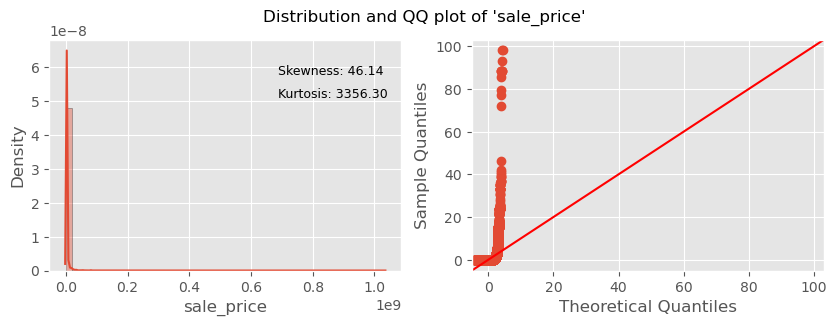

In [34]:
graph_normality(df, 'sale_price')

> **OBSERVATION:** 
-  The histogram of the `sales_price` variable shows that the data is not normally distributed. The data is **skewed to the right**, with a long tail on the right side. This indicates that there are more data points at the lower end of the distribution than at the higher end.
- It is very crowded below the 2,000,000 price point as expected. Lets create a new limitation where the dataset will only include sale prices below 2,000,000.

C:\Users\Lap-5\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


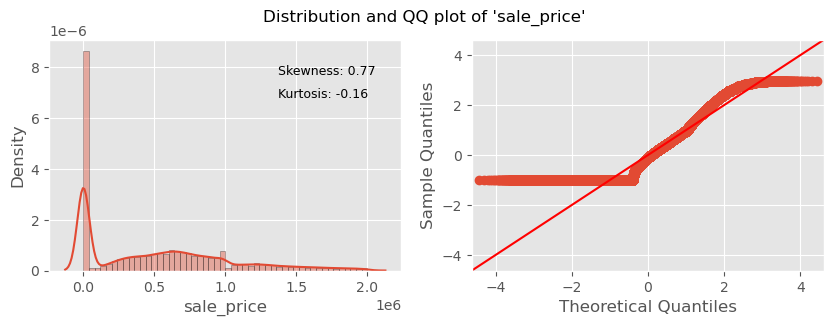

In [35]:
# Visualize and calculate the skewness
df_price = df[(df.sale_price < 2000000)]
graph_normality(df_price, 'sale_price')

> **OBSERVATION:** 

 - Still a bit crowded, but this gives a better idea of the distribution of sale prices. After removing outliers over 200,000,000, the sale price variable appears to be normally distributed and skewed to the right with the exception of the most frequent housing sale price approaching 0.

C:\Users\Lap-5\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


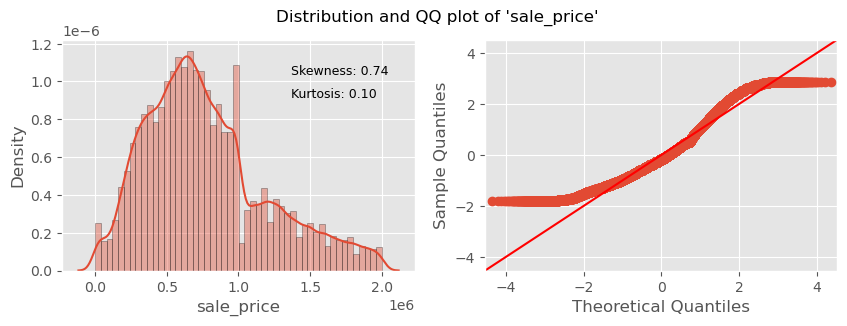

In [36]:
# Visualize and calculate the skewness
df_price = df[(df.sale_price < 2000000) & (df.sale_price > 1000)]
graph_normality(df_price, 'sale_price')

> **OBSERVATION:** Positive kurtosis indicates that a distribution is **more peaked than the normal distribution**, with more values concentrated in the tails. In other words, the distribution has **more extreme values than the normal distribution**.

**Check Normality after removing Oultiers**

In [37]:
df_desc = df[num_cols].describe().transpose()
df_desc['skewness'] = df[num_cols].skew().values
df_desc['Kurtosis'] = df[num_cols].kurtosis().values
df_desc

,count,mean,std,min,25%,50%,75%,max,skewness,Kurtosis
block,258124.0,4.208231e+03,3.583901e+03,1.000000e+00,1.252000e+03,3277.0,6253.000000,1.635000e+04,1.060439,0.662088
lot,258124.0,3.898225e+02,6.636337e+02,1.000000e+00,2.200000e+01,51.0,1003.000000,9.116000e+03,3.339526,22.564749
residential_units,258124.0,3.025776e+00,2.582903e+01,0.000000e+00,1.000000e+00,1.0,3.000000,8.764000e+03,160.526775,51463.915733
commercial_units,258124.0,2.652611e-01,6.439376e+00,0.000000e+00,0.000000e+00,0.0,0.265261,2.261000e+03,205.892459,63780.805523
total_units,258124.0,3.288451e+00,2.669047e+01,0.000000e+00,1.000000e+00,2.0,3.288451,8.812000e+03,150.611490,46337.477307
land_square_feet,258124.0,-2.971528e+09,1.214521e+10,-8.171504e+10,-2.971528e+09,1680.0,2653.000000,7.649136e+06,-6.238613,37.508593
gross_square_feet,258124.0,-1.957087e+09,7.998996e+09,-5.381861e+10,-1.957087e+09,1040.0,2064.000000,8.942176e+06,-6.238612,37.508592
sale_price,258124.0,1.480195e+06,1.050328e+07,0.000000e+00,0.000000e+00,550000.0,990000.000000,1.033000e+09,46.136657,3356.362271


In [38]:
skewed_cols = list( df_desc[df_desc['skewness'] > 1].index)
print(skewed_cols)

['block', 'lot', 'residential_units', 'commercial_units', 'total_units', 'sale_price']


In [39]:
# with the aide of IQR, I limited the features values

norm_df = df[(df['sale_price'] <2000000) #limit up to 2,000,000 
                       & (df['sale_price'] > 1000) #removes all properties less than $1,000
                       & (df['land_square_feet'] < df['gross_square_feet']) #removes instances where land sf is greater than gross sf
                       & (df['gross_square_feet'] < 267000) #removes instances where gross sf is greater than 2530 SF
                       & (df['gross_square_feet'] > 1224)] #removes instances where gross sf is less than 120 SF

norm_df.shape

(16112, 19)

C:\Users\Lap-5\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


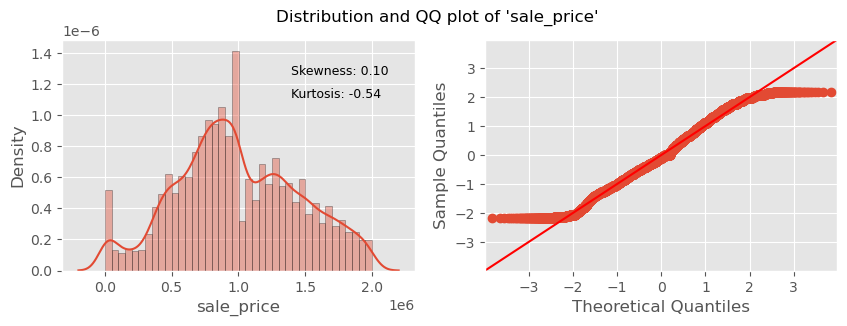

In [40]:
graph_normality(norm_df, 'sale_price')

> **OBSERVATION:** Negative kurtosis indicates that a distribution is **flatter than the normal distribution**, with fewer values concentrated in the tails. In other words, the distribution has **fewer extreme values than the normal distribution**.

### **Statistically Check Normality**

#### Shapiro-Wilk test
The test statistic is a measure of how far the data deviates from a normal distribution.If the p-value is less than the significance level (usually 0.05), the null hypothesis is rejected, and the sample is considered not normally distributed.

Here are some additional details about the Shapiro-Wilk test:
- The Shapiro-Wilk test is a parametric test, which means that it makes assumptions about the distribution of the data. In the case of the Shapiro-Wilk test, the assumption is that the data is normally distributed.
- The Shapiro-Wilk test is a sensitive test, which means that it can detect even small deviations from normality.
- The Shapiro-Wilk test is a relatively powerful test, which means that it has a high probability of detecting a difference from normality if there is one.

In [41]:
# Perform the Shapiro-Wilk test
stat, pval = stats.shapiro(df['sale_price'])

# Print the test results
print("Shapiro-Wilk test results")
print('-'*30)
print(f"Test Statistic: {stat:.3f}")
print(f"P-value: {pval:.3f}")
if pval< 0.05:
    print('Reject the null hypothesis')
    print("\t> The sample is likely not drawn from a normal distribution")
else:
    print('Fail to reject the null hypothesis')
    print("\t> The sample is likely drawn from a normal distribution")
    

Shapiro-Wilk test results
------------------------------
Test Statistic: 0.073
P-value: 0.000
Reject the null hypothesis
	> The sample is likely not drawn from a normal distribution


C:\Users\Lap-5\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


> **OBSERVATION**:

- **Test statistic**: The test statistic for this test is 0.073, which is small value. This suggests that the data is not normally distributed.
- **P-value**: The p-value for this test is 0.000. Therefore, we can reject the null hypothesis of normality and conclude that the data is not normally distributed.

#### D'Agostino's K^2 Test

A low test statistic indicates that the data is not normally distributed. A high test statistic indicates that the data is normally distributed.

In [42]:
stat, pval = stats.normaltest(df['sale_price'])

# Print the test results
print("D'Agostino's K^2 Test results")
print('-'*30)
print(f"Test Statistic: {stat:.3f}")
print(f"P-value: {pval:.3f}")
if pval< 0.05:
    print('Reject the null hypothesis')
    print("\t> The sample is likely not drawn from a normal distribution")
else:
    print('Fail to reject the null hypothesis')
    print("\t> The sample is likely drawn from a normal distribution")
    

D'Agostino's K^2 Test results
------------------------------
Test Statistic: 788844.978
P-value: 0.000
Reject the null hypothesis
	> The sample is likely not drawn from a normal distribution


> **OBSERVATION**:

- Since the p-value is less than the significance level of 0.05, we reject the null hypothesis and conclude that the sample is likely not drawn from a normal distribution. 

#### Kolmogorov-Smirnov Test
The Kolmogorov-Smirnov test is a non-parametric test, which means that it does not make any assumptions about the distribution of the data. The Kolmogorov-Smirnov test is a relatively powerful test, which means that it has a high probability of detecting a difference from normality if there is one.

In [43]:
stat, pval = stats.kstest(df['sale_price'], 'norm')

# Print the test results
print("Kolmogorov-Smirnov Test results")
print('-'*30)
print(f"Test Statistic: {stat:.3f}")
print(f"P-value: {pval:.3f}")
if pval< 0.05:
    print('Reject the null hypothesis')
    print("\t> The sample is likely not drawn from a normal distribution")
else:
    print('Fail to reject the null hypothesis')
    print("\t> The sample is likely drawn from a normal distribution")


Kolmogorov-Smirnov Test results
------------------------------
Test Statistic: 0.707
P-value: 0.000
Reject the null hypothesis
	> The sample is likely not drawn from a normal distribution


> **OBSERVATION**:

- Since the p-value is less than the significance level of 0.05, we reject the null hypothesis and conclude that the sample is likely not drawn from a normal distribution.

#### Anderson-Darling Test
If the test statistic is greater than the critical value at the chosen significance level, the null hypothesis is rejected, and the sample is considered not normally distributed.


In [44]:
# Perform the Shapiro-Wilk test
anderson_res = stats.anderson(df['sale_price'], dist='norm')

# Print the test results
print("Anderson-Darling test results")
print('-'*30)
print(f"Test Statistic: {anderson_res.statistic:.3f}\n")
for i, crit_val in enumerate(anderson_res.critical_values):
    print(f"Significance Level {anderson_res.significance_level[i]:.2f}: Critical Value {crit_val:.3f}")

"""
A lower significance level will make it more difficult to reject the null hypothesis, 
which will make it less likely to detect a difference from normality.
"""
if anderson_res.statistic > anderson_res.critical_values[-1]:
    print('\nReject the null hypothesis')
    print("\t> The sample is not normally distributed")
else:
    print('\nFail to reject the null hypothesis')
    print("\t> The sample is normally distributed")

Anderson-Darling test results
------------------------------
Test Statistic: 77645.079

Significance Level 15.00: Critical Value 0.576
Significance Level 10.00: Critical Value 0.656
Significance Level 5.00: Critical Value 0.787
Significance Level 2.50: Critical Value 0.918
Significance Level 1.00: Critical Value 1.092

Reject the null hypothesis
	> The sample is not normally distributed


> **OBSERVATION**:

The test statistic is 77645.079, which is greater than all the critical values at different significance levels. Therefore, we **reject the null hypothesis** and conclude that the sample is **not normally distributed**. 

- Based on the results of the Anderson-Darling test, we can conclude that the data is not normally distributed. This means that we cannot use any statistical tests that assume normality, such as the t-test or the ANOVA. We will need to use a non-parametric test instead.

- The histogram of the sales_price variable shows that the data is not normally distributed. The data is skewed to the right, with a long tail on the right side. This indicates that there are more data points at the lower end of the distribution than at the higher end.

- The QQplot of sales_price variable shows that the points on the plot deviate significantly from the reference line, so that the variable has heavy tails, or is skewed.

- All of the tests have very low p-values (less than the significance level of 0.05), which means that we can reject the null hypothesis that the sample is drawn from a normal distribution. 

- The Anderson-Darling test also shows that the test statistic is much larger than all the critical values at different significance levels, which further confirms that the sample is not normally distributed.


---
---

<h1><font color = '#2E58B8'>Hypothesis Testing </font></h1>

----

Design hypothesis test to answer the following two questions:

"Has the NYC real estate market changed following the declaration of the COVID-19 pandemic in March of 2020?"

"Do properties in Manhattan sell at higher prices than properties elsewhere?"

For each question, you need to give the null hypothesis $H_0$ and alternative hypothesis $H_1$


### (1) Has the NYC real estate market changed following the declaration of the COVID-19 pandemic in March of 2020?

- **Null hypothesis $H_0$**: The NYC real estate market has not changed following the declaration of the COVID-19 pandemic in March of 2020.
- **Alternative hypothesis $H_1$**: The NYC real estate market has changed following the declaration of the COVID-19 pandemic in March of 2020.
> To test these hypotheses, we could then use a statistical test to compare the prices of properties before and after the pandemic. If the results of the statistical test are statistically significant, then we can reject the null hypothesis and conclude that the NYC real estate market has changed following the declaration of the pandemic.


In [45]:
from cliffs_delta import cliffs_delta

# Split the data into two groups: before and after March 2020
before_covid = df.loc[df['sale_date'] < '2020-03-01']['sale_price']
after_covid = df.loc[df['sale_date'] >= '2020-03-01']['sale_price']

# The t-test to compare the prices of properties before and after the pandemic
print('- Statistics:', stat)
print('- p-value:', pval)

if pval < 0.05:
    print("- Reject the null hypothesis\n    -> The NYC real estate market has changed following the declaration of the pandemic ^_^")
else:
    print("- Fail to reject the null hypothesis\n    -> The NYC real estate market has not changed following the declaration of the pandemic")

- Statistics: 0.706934747998532
- p-value: 0.0
- Reject the null hypothesis
    -> The NYC real estate market has changed following the declaration of the pandemic ^_^


In [46]:
# Perform the Mann-Whitney U test
stat, valp = stats.mannwhitneyu(x=before_covid, y=after_covid, alternative = 'two-sided')
print('- Statistics:', stat)
print('- p-value:', pval)

if pval < 0.05:
    print("- Reject the null hypothesis\n    -> The NYC real estate market has changed following the declaration of the pandemic ^_^")
else:
    print("- Fail to reject the null hypothesis\n    -> The NYC real estate market has not changed following the declaration of the pandemic")

print('- Cliffs delta: ', cliffs_delta(before_covid,after_covid)[0])
print('- The difference between the two groups: ', cliffs_delta(before_covid,after_covid)[1])

- Statistics: 1580516188.0
- p-value: 0.0
- Reject the null hypothesis
    -> The NYC real estate market has changed following the declaration of the pandemic ^_^
- Cliffs delta:  -0.07454842371428096
- The difference between the two groups:  negligible


> **OBSERVATION:** 

- **Reject the null hypothesis**: The NYC real estate market has changed following the declaration of the pandemic ^_^
- The effect size is -0.074, which is considered **negligible**. This suggests that while there is a statistically **significant difference in the prices** of properties before and after the pandemic, the **magnitude of the difference is small**.
- The results of the t-test, the Mann-Whitney U test, and Cliff's delta suggest that there is a statistically significant difference between the SALE PRICE before and after COVID-19. **The difference is small, but it is statistically significant.** 

### (2) Do properties in Manhattan sell at higher prices than properties elsewhere?

- **Null hypothesis $H_0$**: Properties in Manhattan do not sell at higher prices than properties elsewhere.
- **Alternative hypothesis $H_1$**: Properties in Manhattan sell at higher prices than properties elsewhere.

> To test these hypotheses, we could then use a statistical test to compare the prices of properties of properties in Manhattan to the prices of properties elsewhere. If the results of the statistical test are statistically significant, then we can reject the null hypothesis and conclude that that properties in Manhattan sell at higher prices than properties elsewhere.


In [47]:
# Perform the Mann-Whitney U test

Manhatten = df.loc[df['borough'] == 1]['sale_price']
Others = df.loc[df['borough'] != 1]['sale_price']

stat, pval =stats.mannwhitneyu(x=Manhatten, y=Others, alternative = 'greater')
print('- Statistics:', stat)
print('- p-value:', pval)

if pval < 0.05:
    print("- Reject the null hypothesis\n    -> Properties in Manhattan sell at higher prices than properties elsewhere. ^_^")
else:
    print("- Fail to reject the null hypothesis\n    -> Properties in Manhattan do not sell at higher prices than properties elsewhere.")

print('- Cliffs delta: ', cliffs_delta(Manhatten,Others)[0])
print('- The difference between the two groups: ', cliffs_delta(Manhatten,Others)[1])

- Statistics: 7746368785.0
- p-value: 0.0
- Reject the null hypothesis
    -> Properties in Manhattan sell at higher prices than properties elsewhere. ^_^
- Cliffs delta:  0.35330705740930907
- The difference between the two groups:  medium


> **OBSERVATION:** 

- The p-value of 0.0 means that the probability of getting the observed results if the null hypothesis is true is 0. This is a very low probability, so we can **reject the null hypothesis**. We can conclude that there is strong evidence that properties in Manhattan sell at higher prices than properties elsewhere.
- The effect size of Cliff's delta is **medium** as the value of Cliff's delta is 0.35 (>0.1). This indicates that the difference between the two groups is medium.
- Some possible reasons why properties in Manhattan sell at higher prices than properties elsewhere:

        - Manhattan is a more desirable place to live. It has a higher population density, more job opportunities, and better schools.
        - Manhattan is a more expensive place to live. The cost of living is higher in Manhattan than in other parts of New York City.
        - Manhattan is a more competitive market. There are more buyers and sellers in Manhattan than in other parts of New York City.

---

<h2><font color = '#2E58B8'>Testing Conclsuion</font></h2>

----
- NYC real estate market has changed following the declaration of the COVID-19 pandemic in March of 2020. The prices of properties have decreased, but the magnitude of the decrease is small. 
- Properties in Manhattan sell at higher prices than properties elsewhere. The difference in prices is medium.

**Here are some possible reasons for the changes in the NYC real estate market:**

- The COVID-19 pandemic caused a decrease in demand for housing in NYC. The decrease in demand and supply led to a decrease in prices.
- During COVID-19 pandemic many people were unable to sell their homes due to the economic downturn.

**The difference in prices between properties in Manhattan and properties elsewhere is likely due to a number of factors, including:**

    - The higher population density in Manhattan
    - The higher job opportunities in Manhattan
    - The better schools in Manhattan

> These factors make Manhattan a more desirable place to live, which drives up the prices of properties.


### **Dealing With Categorical Features:** Encoding 

In [48]:
df1 = df.copy()

In [49]:
cat_cols = list(df1.select_dtypes(include=["category"]).columns)
df1[cat_cols].nunique()

borough                                5
neighborhood                         255
building_class_category               44
tax_class_at_present                  10
building_class_at_present            174
address                           241220
zip_code                             196
year_built                           192
tax_class_at_time_of_sale              3
building_class_at_time_of_sale       173
dtype: int64

#### **Drop `address` ans `zip_code`**

In [50]:
df1 = df1.drop(['address','zip_code'], axis = 1);

#### **Convert `neighborhood` to 50 categories using KMeans clustering**

In [51]:
from sklearn.cluster import KMeans

# Create a feature matrix based on the zip_code variable
X = pd.get_dummies(df1['neighborhood'])

# Create the K-Means model
kmeans = KMeans(n_clusters=50)

# Fit the model to the data
kmeans.fit(X)

# Get the cluster labels for each data point
labels = kmeans.labels_

# Add the cluster labels to the original dataframe
df1["neighborhood"] = labels
df1["neighborhood"] = df1["neighborhood"].astype('category')

In [52]:
cat_cols = list(df1.select_dtypes(include=["category"]).columns)
df1[cat_cols].nunique()

borough                             5
neighborhood                       50
building_class_category            44
tax_class_at_present               10
building_class_at_present         174
year_built                        192
tax_class_at_time_of_sale           3
building_class_at_time_of_sale    173
dtype: int64

#### **Try One-Hot encoding**

In [53]:
# Create dummy variables for categorical variables using one-hot encoding
cat_cols = list(df1.select_dtypes(include=["category"]).columns)
dummy_df = pd.get_dummies(df1[cat_cols], prefix_sep="_")
# Add a column of unique IDs
dummy_df['id'] = range(dummy_df.shape[0])
dummy_df.shape 

(258124, 652)

#### **Try Label Encoder**

In [54]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
le = LabelEncoder()

# Fit and transform the label encoder to the categorical features
le_df = df1[cat_cols].apply(le.fit_transform)
le_df['id'] = range(le_df.shape[0])
le_df.shape 

(258124, 9)

#### **Dealing With Numerical Features:** Scaling

In [55]:
from sklearn.preprocessing import RobustScaler

num_cols = df1.select_dtypes(include=[np.number]).columns.tolist()
# Remove the target variable from the list
num_cols.remove('sale_price')  

# Create a robust scaler object
sc = RobustScaler()

# Fit and transform the robust scaler to the numerical features
sc_df = sc.fit_transform(df1[num_cols])

sc_df = pd.DataFrame(sc_df , columns = num_cols )
sc_df['id'] = range(sc_df.shape[0])
sc_df.shape

(258124, 8)

#### **Concate the categorical and the numeric dataframes**

In [56]:
# Concatenate the label_encoder_df variables with the numeric dataframe
sc_df = sc_df.set_index('id') 
dummy_df = dummy_df.set_index('id')

one_hot_final_df = pd.concat([sc_df, dummy_df], axis=1)

one_hot_final_df.shape

(258124, 658)

In [57]:
# Concatenate the dummy variables with the numeric dataframe
le_df = le_df.set_index('id')

label_encoder_final_df = pd.concat([sc_df, le_df], axis=1)

label_encoder_final_df.shape

(258124, 15)

In [58]:
from sklearn.metrics import mean_squared_error
def rmse(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

### **Create Regression model to predict the `sale_price` and diaply the model performance**

#### **0. Using Data Encoded by one hot encoder**

In [59]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = one_hot_final_df
y = df1.sale_price

# splitting dataset to train and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the linear regression model
model1 = LinearRegression().fit(X_train, y_train)
print("results when using the encoding data by one-hot encoder".title())
print("="*65)
print("Linear Regression RMSE on the training set: {}".format(rmse(y_train.values, model1.predict(X_train.values))))

# Evaluate the model on validation set
print("Linear Regression RMSE on the testing set : {}".format(rmse(y_test.values,  model1.predict(X_test.values))))
score = model1.score(X_test, y_test)
print('R^2 score:', score)

Results When Using The Encoding Data By One-Hot Encoder
Linear Regression RMSE on the training set: 9489688.551283438
Linear Regression RMSE on the testing set : 3480457231514.7407
R^2 score: -103588107601.70703


> **OBSERVATION**: To improve the model, there are a few things to try:

1. Using **Label Encoder** instead of one hot encoding.
2. Generate **polynomial features from X** and then fit the model. 
2. Try **regularizing** the model to reduce overfitting, using Ridge or Lasso regression.
3. **Remove outlier** values from the y (target) data.

#### **1. Using Data Encoded by label encoder**

In [60]:
X = label_encoder_final_df

# splitting dataset to train and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the linear regression model
model2 = LinearRegression().fit(X_train, y_train)
print("results when using the encoding data by label encoder".title())
print("="*65)
print("Linear Regression RMSE on the training set: {}".format(rmse(y_train.values, model2.predict(X_train.values))))

# Evaluate the model on validation set
print("Linear Regression RMSE on the testing set : {}".format(rmse(y_test.values,  model2.predict(X_test.values))))
score = model2.score(X_test, y_test)
print('Linear Regression R^2 score  \t\t  :', score)

Results When Using The Encoding Data By Label Encoder
Linear Regression RMSE on the training set: 10181995.130426943
Linear Regression RMSE on the testing set : 10731156.750389745
Linear Regression R^2 score  		  : 0.015240058862706074


#### **2. Using polynomial regression**

In [61]:
from sklearn.preprocessing import PolynomialFeatures

# Create polynomial features 
d=2
poly_features = PolynomialFeatures(degree = d)  
X_poly = poly_features.fit_transform(X)

X = label_encoder_final_df
# splitting dataset to train and validation sets
X_train_poly, X_test_poly, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Fit linear regression model 
poly_model = LinearRegression().fit(X_train_poly, y_train)
print(f"results when using the encoding data by label encoder with Polynomial regression of degree {d} ".title())
print("="*100)
print("Polynomial Regression RMSE on the training set: {}".format(rmse(y_train.values, poly_model.predict(X_train_poly))))

# Evaluate the model on validation set
print("Polynomial Regression RMSE on the testing set : {}".format(rmse(y_test.values,  poly_model.predict(X_test_poly))))
score = poly_model.score(X_test_poly, y_test)
print('Polynomial Regression R^2 score\t\t      :' , score)

Results When Using The Encoding Data By Label Encoder With Polynomial Regression Of Degree 2 
Polynomial Regression RMSE on the training set: 9583575.207736874
Polynomial Regression RMSE on the testing set : 84371759.39906946
Polynomial Regression R^2 score		      : -59.873953384742556


#### **3. Using Regularization by Ridge**

In [62]:
from sklearn.linear_model import Ridge, Lasso
# a multiple linear regression model
model_base = LinearRegression()

# With Ridge 
lambda_list_ridge = list(np.linspace(20, 25, 101))
model_ridge = Ridge(alpha=lambda_list_ridge[0]).fit(X_train, y_train)
print("results when using the encoding data by label encoder with Regularization by Ridge".title())
print("="*100)

print("Polynomial Regression RMSE on the training set: {}".format(rmse(y_train.values, model_ridge.predict(X_train))))
print("Polynomial Regression RMSE on the testing set: {}".format(rmse(y_test.values,  model_ridge.predict(X_test))))
score = poly_model.score(X_test_poly, y_test)
print('R^2 score:', score)


Results When Using The Encoding Data By Label Encoder With Regularization By Ridge
Polynomial Regression RMSE on the training set: 10305548.459949506
Polynomial Regression RMSE on the testing set: 10783540.15102865
R^2 score: -59.873953384742556


#### **4. Using Regularization by Lasso**

In [63]:
# lambda_list_lasso = list(np.linspace(0.0006, 0.0007, 11))
# model_lasso = Lasso(alpha=lambda_list_lasso[0], max_iter=500000).fit(X_train_poly, y_train)
# print("results when using the encoding data by label encoder with Regularization by Lasso ".title())
# print("="*100)

# print("Polynomial Regression RMSE on the training set: {}".format(rmse(y_train.values, poly_model.predict(X_train_poly))))
# print("Polynomial Regression RMSE on the testing set: {}".format(rmse(y_test.values,  poly_model.predict(X_test_poly))))
# score = poly_model.score(X_test_poly, y_test)
# print('R^2 score:', score)

---
---
<h1><font color = '#A51616'>Question 4</font></h1>

---

(1) Perform a multiple linear regression analysis on the given data, considering impact of missing values. Note, you need to properly transfer categorical features to numerical features first.
(2) Report the features that are significant relevant to sale price based on the results of your regression model.

Using **OLS** Model to Check the `p-values` in the $P>|t|$ column of the summary table. If the p-value is less than 0.05, the variable is generally considered significant at the 5% level. In this case, the t-statistic is used to determine if each coefficient is significantly different from zero. Coefficients with t-stats over 2 (or -2) are typically considered significant.

#### **OLS Using Data Encoded by label encoder**

In [64]:
X = label_encoder_final_df
y.index = X.index

In [65]:
# Fit the regression model
model4 = sm.OLS(y, sm.add_constant(X)).fit()

equation = f'sale_price = {model4.params[0]}'
for i, coeff in enumerate(X.columns):
    equation += f' + {np.round(model4.params[i],2)} * {coeff}'

print(equation)

sale_price = -39470139666667.43 + -39470139666667.43 * block + -317750.02 * lot + -54307.83 * residential_units + 78940281742412.33 * commercial_units + 10469894462791.34 * total_units + -90325492178598.9 * land_square_feet + -50755024612.07 * gross_square_feet + 152833229100.5 * borough + -254207.12 * neighborhood + 3084.04 * building_class_category + 86511.88 * tax_class_at_present + -376770.72 * building_class_at_present + -2880.25 * year_built + -954.42 * tax_class_at_time_of_sale + 2233972.26 * building_class_at_time_of_sale


#### **Significant Features**

In [71]:
pvals = model4.pvalues
coef = model4.params

# significance level
alpha = 0.05

# Check significance of each coefficient
significant_features = []
for i in range(len(coef)):
    if pvals[i] < alpha:
        significant_features.append(coef.index[i])

# Report the significant features
print(f"There are {len(significant_features)} significant relevant to sale price features at a significance level of {alpha}:")
print(significant_features)

There are 12 significant relevant to sale price features at a significance level of 0.05:
['const', 'block', 'residential_units', 'commercial_units', 'total_units', 'land_square_feet', 'gross_square_feet', 'borough', 'neighborhood', 'building_class_category', 'tax_class_at_present', 'tax_class_at_time_of_sale']


#### **OLS Model Summary**

In [72]:
# Print the coefficient of determination 
print(model4.summary().tables[0])

r_squared = model4.rsquared
adj_r_squared = model4.rsquared_adj

print("R-squared: {:.4f}".format(r_squared))
print("Adjusted R-squared: {:.4f}".format(adj_r_squared))

                            OLS Regression Results                            
Dep. Variable:             sale_price   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     735.2
Date:                Fri, 19 May 2023   Prob (F-statistic):               0.00
Time:                        07:27:15   Log-Likelihood:            -4.5340e+06
No. Observations:              258124   AIC:                         9.068e+06
Df Residuals:                  258108   BIC:                         9.068e+06
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
R-squared: 0.0410
Adjusted R-squared: 0.0409


In [73]:
# Convert table to list of lists
table_data = []
for row in model4.summary().tables[1].data:
    table_data.append(row)

# Convert list of lists to DataFrame
results = pd.DataFrame(table_data[1:], columns=table_data[0])

# Set the index to the variable names
results.set_index('', inplace=True)

# Print the resulting DataFrame
results

,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
const,-3.947e+13,6.15e+11,-64.163,0.000,-4.07e+13,-3.83e+13
block,-3.178e+05,3.26e+04,-9.739,0.000,-3.82e+05,-2.54e+05
lot,-5.431e+04,4.37e+04,-1.243,0.214,-1.4e+05,3.13e+04
residential_units,7.894e+13,1.23e+12,64.163,0.000,7.65e+13,8.14e+13
commercial_units,1.047e+13,1.63e+11,64.163,0.000,1.02e+13,1.08e+13
total_units,-9.033e+13,1.41e+12,-64.163,0.000,-9.31e+13,-8.76e+13
land_square_feet,-5.076e+10,9.89e+08,-51.330,0.000,-5.27e+10,-4.88e+10
gross_square_feet,1.528e+11,2.07e+09,73.857,0.000,1.49e+11,1.57e+11
borough,-2.542e+05,1.9e+04,-13.390,0.000,-2.91e+05,-2.17e+05


> **OBSERVATION:** The model appears to have limited predictive power, as indicated by the low R-squared value
- The R-squared is 0.041, which means that the model explains only **4.1%** of the variation in the sale price.
- The p-value of the F-statisti is very small, indicating that at least one of the predictor variables is useful in predicting the response variable.

In [74]:
# Convert table to list of lists
table_data = []
for row in model4.summary().tables[1].data:
    table_data.append(row)

# Convert list of lists to DataFrame
results = pd.DataFrame(table_data[1:], columns=table_data[0])

# Set the index to the variable names
results.set_index('', inplace=True)
results

,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
const,-3.947e+13,6.15e+11,-64.163,0.000,-4.07e+13,-3.83e+13
block,-3.178e+05,3.26e+04,-9.739,0.000,-3.82e+05,-2.54e+05
lot,-5.431e+04,4.37e+04,-1.243,0.214,-1.4e+05,3.13e+04
residential_units,7.894e+13,1.23e+12,64.163,0.000,7.65e+13,8.14e+13
commercial_units,1.047e+13,1.63e+11,64.163,0.000,1.02e+13,1.08e+13
total_units,-9.033e+13,1.41e+12,-64.163,0.000,-9.31e+13,-8.76e+13
land_square_feet,-5.076e+10,9.89e+08,-51.330,0.000,-5.27e+10,-4.88e+10
gross_square_feet,1.528e+11,2.07e+09,73.857,0.000,1.49e+11,1.57e+11
borough,-2.542e+05,1.9e+04,-13.390,0.000,-2.91e+05,-2.17e+05


In [75]:
results = results.apply(pd.to_numeric)
cond = (results['P>|t|'] < 0.05)
results[cond]

,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
const,-3.947000e+13,6.150000e+11,-64.163,0.000,-4.070000e+13,-3.830000e+13
block,-3.178000e+05,3.260000e+04,-9.739,0.000,-3.820000e+05,-2.540000e+05
residential_units,7.894000e+13,1.230000e+12,64.163,0.000,7.650000e+13,8.140000e+13
commercial_units,1.047000e+13,1.630000e+11,64.163,0.000,1.020000e+13,1.080000e+13
total_units,-9.033000e+13,1.410000e+12,-64.163,0.000,-9.310000e+13,-8.760000e+13
land_square_feet,-5.076000e+10,9.890000e+08,-51.330,0.000,-5.270000e+10,-4.880000e+10
gross_square_feet,1.528000e+11,2.070000e+09,73.857,0.000,1.490000e+11,1.570000e+11
borough,-2.542000e+05,1.900000e+04,-13.390,0.000,-2.910000e+05,-2.170000e+05
neighborhood,3.084036e+03,1.409060e+03,2.189,0.029,3.223160e+02,5.845756e+03


---

<h2><font color = '#A51616'>Summarize your answers to Q4 below, based on your analysis</font></h2>

----

Based on the OLS regression results, it appears that there are several features that are significantly related to the sale price of the properties. Out of the 15 predictor variables, 12 are statistically significant at a significance level of 0.05. 

* These significant variables are: 'const', 'block', 'residential_units', 'commercial_units', 'total_units', 'land_square_feet', 'gross_square_feet', 'borough', 'neighborhood', 'building_class_category', 'tax_class_at_present', and 'tax_class_at_time_of_sale'.
* The coefficients for 'residential_units', 'commercial_units', and 'total_units' are positive, which suggests that an increase in the number of units is associated with an increase in the sale price.
* The coefficient for 'land_square_feet' is negative, which suggests that an increase in the land area is associated with a decrease in the sale price.